In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [4]:
data['Label'].unique()

array(['s', 'b'], dtype=object)

In [5]:
data.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [6]:
# Using LabelEncoder to change the labels: s:1, b:0
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Label'] = enc.fit_transform(data['Label'])
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,0
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,0


In [7]:
# replacing -999 values to NaN
data.replace(-999,np.NaN,inplace=True)
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,1
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,0
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,0
3,100003,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,0
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,0


In [8]:
data.isna().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [9]:
#Imputing DER_mass_MMC column with 0
data['DER_mass_MMC'].fillna(0,inplace=True)

In [10]:
data['PRI_jet_num'].unique()

array([2, 1, 0, 3], dtype=int64)

In [11]:
data[data['PRI_jet_num']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99913 entries, 3 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      99913 non-null  int64  
 1   DER_mass_MMC                 99913 non-null  float64
 2   DER_mass_transverse_met_lep  99913 non-null  float64
 3   DER_mass_vis                 99913 non-null  float64
 4   DER_pt_h                     99913 non-null  float64
 5   DER_deltaeta_jet_jet         0 non-null      float64
 6   DER_mass_jet_jet             0 non-null      float64
 7   DER_prodeta_jet_jet          0 non-null      float64
 8   DER_deltar_tau_lep           99913 non-null  float64
 9   DER_pt_tot                   99913 non-null  float64
 10  DER_sum_pt                   99913 non-null  float64
 11  DER_pt_ratio_lep_tau         99913 non-null  float64
 12  DER_met_phi_centrality       99913 non-null  float64
 13  DER_lep_eta_cen

In [12]:
data[data['PRI_jet_num']==1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77544 entries, 1 to 249997
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      77544 non-null  int64  
 1   DER_mass_MMC                 77544 non-null  float64
 2   DER_mass_transverse_met_lep  77544 non-null  float64
 3   DER_mass_vis                 77544 non-null  float64
 4   DER_pt_h                     77544 non-null  float64
 5   DER_deltaeta_jet_jet         0 non-null      float64
 6   DER_mass_jet_jet             0 non-null      float64
 7   DER_prodeta_jet_jet          0 non-null      float64
 8   DER_deltar_tau_lep           77544 non-null  float64
 9   DER_pt_tot                   77544 non-null  float64
 10  DER_sum_pt                   77544 non-null  float64
 11  DER_pt_ratio_lep_tau         77544 non-null  float64
 12  DER_met_phi_centrality       77544 non-null  float64
 13  DER_lep_eta_cen

In [13]:
data[(data['PRI_jet_num']==2) | (data['PRI_jet_num']==3)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72543 entries, 0 to 249994
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      72543 non-null  int64  
 1   DER_mass_MMC                 72543 non-null  float64
 2   DER_mass_transverse_met_lep  72543 non-null  float64
 3   DER_mass_vis                 72543 non-null  float64
 4   DER_pt_h                     72543 non-null  float64
 5   DER_deltaeta_jet_jet         72543 non-null  float64
 6   DER_mass_jet_jet             72543 non-null  float64
 7   DER_prodeta_jet_jet          72543 non-null  float64
 8   DER_deltar_tau_lep           72543 non-null  float64
 9   DER_pt_tot                   72543 non-null  float64
 10  DER_sum_pt                   72543 non-null  float64
 11  DER_pt_ratio_lep_tau         72543 non-null  float64
 12  DER_met_phi_centrality       72543 non-null  float64
 13  DER_lep_eta_cen

In [14]:
no_jet = data['PRI_jet_num']==0
one_jet = data['PRI_jet_num']==1

In [15]:
#Imputing missing values in other columns as the other columns
data.loc[no_jet,['DER_mass_jet_jet','PRI_jet_leading_pt','PRI_jet_subleading_pt']] = 0
data.loc[one_jet,['DER_mass_jet_jet','PRI_jet_subleading_pt']] = 0
data.loc[no_jet,'DER_deltaeta_jet_jet'] = 40.0
data.loc[one_jet,'DER_deltaeta_jet_jet'] = data.loc[one_jet,'PRI_jet_leading_eta'].abs()+20
data.loc[no_jet,'DER_prodeta_jet_jet'] = -400
data.loc[one_jet,'DER_prodeta_jet_jet'] = data.loc[one_jet,'PRI_jet_leading_eta'].abs()*(-20)
data.loc[no_jet,'DER_lep_eta_centrality'] = 1.1
data.loc[one_jet,'DER_lep_eta_centrality'] = np.exp(-1)
data.loc[no_jet,'PRI_jet_leading_eta'] = 20
data.loc[no_jet,'PRI_jet_leading_phi'] = 4
data.loc[no_jet,'PRI_jet_subleading_eta'] = -20
data.loc[one_jet,'PRI_jet_subleading_eta'] = np.sign(data.loc[one_jet,'PRI_jet_leading_eta'])*20
data['PRI_jet_subleading_phi'].fillna(4,inplace=True)

data.isna().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [16]:
X = data.drop(['EventId','Weight','Label'],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [17]:
y = data['Label']
y.value_counts()

0    164333
1     85667
Name: Label, dtype: int64

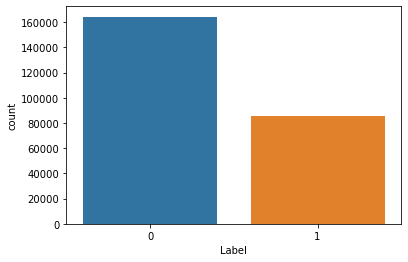

In [18]:
sns.countplot(y)
plt.show()

In [45]:
# Scaling the data to mean = 0, standard deviation = 1 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)
X_scaled.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,0.513222,0.068332,0.407680,-0.469966,-1.447668,0.061716,0.911540,0.882478,1.033099,0.339894,...,-0.147267,0.386847,1.044402,0.263213,-0.590292,-0.474829,0.935741,0.621529,-2.575750,0.412510
1,0.840891,0.552505,0.540136,-0.153167,-0.169588,-0.395606,0.820624,1.404888,-0.756027,-0.287584,...,-1.051683,-0.357719,0.021305,-0.074869,-0.734301,-0.179294,-0.534065,1.883224,0.562836,-0.273820
2,-1.506293,3.195156,1.096560,-0.349710,-0.083931,-0.395606,0.679953,0.989770,-0.430168,0.340361,...,-1.200672,0.400135,0.021305,-0.106352,-0.600095,-1.498025,-0.534065,1.883224,0.562836,-0.293970
3,0.592488,0.910379,-0.005853,-0.903016,1.073662,-0.395606,-1.221109,1.196690,-0.830735,-0.712705,...,0.038692,-0.978149,-1.001792,-0.811735,1.213609,0.997050,-0.534065,-0.806958,0.562836,-0.745439
4,1.058594,-0.914556,1.313369,-0.651804,1.073662,-0.395606,-1.221109,1.938794,-0.112795,-0.868143,...,-0.475042,-1.238475,-1.001792,-0.811735,1.213609,0.997050,-0.534065,-0.806958,0.562836,-0.745439


In [46]:
from sklearn.decomposition import PCA
pca_30 = PCA(n_components = 30)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [47]:
print("Variance explained by all 30 features:", sum(pca_30.explained_variance_ratio_ * 100))

Variance explained by all 30 features: 99.99999999999997


In [48]:
np.cumsum(pca_30.explained_variance_ratio_ * 100)

array([ 36.21867252,  44.41023856,  52.36862983,  58.90915127,
        64.14729071,  68.73482881,  72.76150327,  76.27021816,
        79.70598378,  82.8025198 ,  85.48397049,  87.78311106,
        89.65099486,  91.355949  ,  92.89716624,  94.37038155,
        95.50712663,  96.39807277,  97.17205505,  97.73105306,
        98.22869036,  98.68677541,  99.11154148,  99.42731441,
        99.64579896,  99.8617474 ,  99.95430608,  99.98173696,
       100.        , 100.        ])

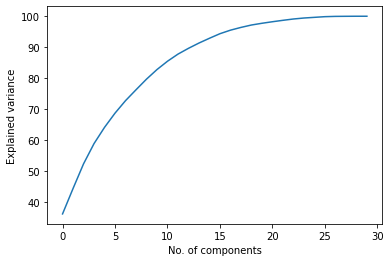

In [49]:
plt.plot(np.cumsum(pca_30.explained_variance_ratio_ * 100))
plt.xlabel("No. of components")
plt.ylabel("Explained variance")
plt.savefig("elbow_plot.png", dpi = 100)
plt.show()

In [51]:
sum(np.cumsum(pca_30.explained_variance_ratio_) < 0.956)

17

In [53]:
np.cumsum(pca_30.explained_variance_ratio_)[16]

0.9550712663311771

In [54]:
#Taking 17 components as 95.5 % variances is explained in 17 components
pca_17 = PCA(n_components = 17)
pca_17.fit(X_scaled)
X_pca_17 = pca_17.transform(X_scaled)

In [55]:
X_pca_17.shape

(250000, 17)

In [56]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 2, shuffle = True, random_state = 42)
for index,_ in skf.split(X_pca_17, y):
    X_half, tempx = X_pca_17[index], X_pca_17[_]
    y_half, tempy = y[index], y[_]
X_half.shape

(125000, 17)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_half, y_half, test_size=0.33, random_state=42, stratify=y_half)

In [58]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
# Training model with default parameters on SVM Model
clf1 = SVC()
clf1.fit(X_train,y_train)
clf1.score(X_train,y_train) # train accuracy

0.8367283582089552

In [60]:
clf1.score(X_test,y_test) # test accuracy

0.8250424242424242

In [61]:
# Using GridSearchCV to optimize parameters
svm = SVC()
parameters = {'C':[1,10,100], 'kernel': ['linear', 'rbf', 'poly']}
svm_model = GridSearchCV(svm, parameters, cv = 3, n_jobs=-1, verbose=3, refit=True)
svm_model.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  27 | elapsed: 247.3min remaining: 56.2min
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 542.6min finished


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

In [62]:
svm_model.score(X_train,y_train) # train accuracy (CV Accuracy)

0.8525970149253731

In [63]:
svm_model.score(X_test,y_test) # test accuracy

0.8290424242424242

In [64]:
svm_model.best_params_

{'C': 10, 'kernel': 'rbf'}

In [65]:
# Training models with default parameters on MLP Classifier
clf2 = MLPClassifier()
clf2.fit(X_train,y_train)
clf2.score(X_train,y_train) # train accuracy

0.844489552238806

In [66]:
clf2.score(X_test,y_test) # test accuracy 

0.8302060606060606

In [67]:
# Using GridSearchCV to optimize parameters
mlp = MLPClassifier(max_iter = 5000, random_state = 10)
params = {'hidden_layer_sizes':[(50,),(50,25)],'activation':['relu','logistic']}
mlp_model = GridSearchCV(mlp, params, cv = 3, n_jobs = -1, verbose=3, refit = True)
mlp_model.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:  1.8min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:  3.4min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  4.8min finished


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=5000, random_state=10),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'hidden_layer_sizes': [(50,), (50, 25)]},
             verbose=3)

In [68]:
mlp_model.score(X_train,y_train) # train accuracy (CV accuracy)

0.8402029850746269

In [69]:
mlp_model.score(X_test,y_test) # test accuracy

0.8310545454545455

In [70]:
mlp_model.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (50,)}